# The Normal Equation

In [1]:
# Generate some test data
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

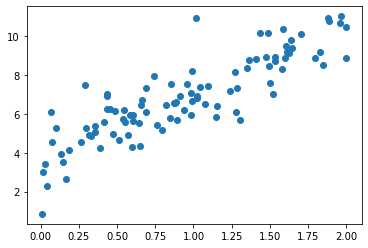

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [3]:
len(X)

100

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.80409901],
       [3.25625756]])

In [6]:
# Make predictions using theta
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.80409901],
       [10.31661413]])

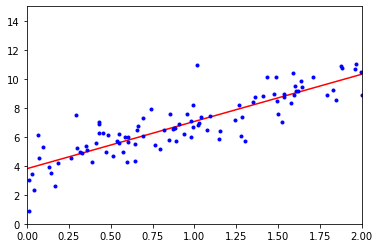

In [7]:
# Plot the model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [8]:
X_new

array([[0],
       [2]])

In [9]:
y_predict

array([[ 3.80409901],
       [10.31661413]])

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.80409901]), array([[3.25625756]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.80409901],
       [10.31661413]])

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.80409901],
       [3.25625756]])

In [13]:
# Can calculate theta using the equation theta = X pseudoinverse dot y
np.linalg.pinv(X_b).dot(y)

array([[3.80409901],
       [3.25625756]])

# Batch Gradient Descent

In [14]:
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.80409901],
       [3.25625756]])

[[3.80127032]
 [3.25881662]]


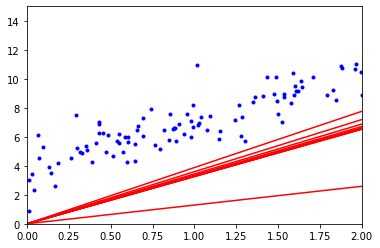

[[3.80409901]
 [3.25625756]]


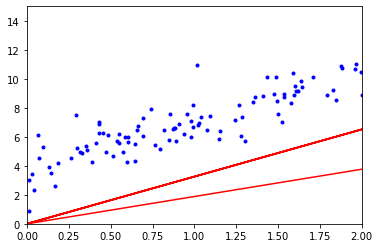

[[-4.88040904e+15]
 [-5.39461527e+15]]


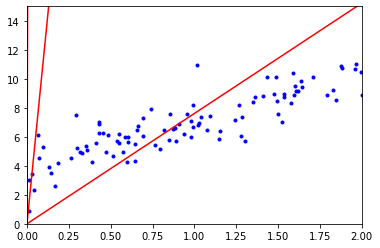

In [16]:
eta_list = [0.02, 0.1, 0.5]
start = np.ones((2, 1))
start[0] = 0
start[1] = 2

for e in eta_list:
    plt.plot(X, y, "b.")
    plt.axis([0, 2, 0, 15])
    theta = np.random.randn(2, 1) # random initialization

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - e * gradients
        if iteration % 100 == 0:
            plt.plot(start, start*theta, "r-")
        
    print(theta)
    plt.show()
    

In [17]:
theta

array([[-4.88040904e+15],
       [-5.39461527e+15]])

# Stochastic Gradient Descent

In [18]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparamters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [19]:
theta

array([[3.81535825],
       [3.25784694]])